#### This is the 'Modeling' Workbook by Megan Gray for the "Forest Cover Type Dataset: Tree types found in the Roosevelt National Forest in Colorado.

https://www.kaggle.com/uciml/forest-cover-type-dataset

Please note that you will need to apply the covtype.csv datafile from the above link to the 'Scrub' workbook in order to procure the "soilsCovDF" file needed for this section of the process.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import os
import time
import sys

List of Cover Types and the respective Tree Types:

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz

In [20]:
soilsCovDF = pd.read_csv("Data/soilsCovtype.csv")

/Users/Megan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
soilsCovDF.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Cover_Type,SoilType,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone,GeoSoils
0,2596,51,3,258,0,510,221,232,148,6279,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
2,2595,45,2,153,-1,391,220,234,150,6172,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
3,2579,132,6,300,-15,67,230,237,140,6031,...,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
4,2606,45,7,270,5,633,222,225,138,6256,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1


In [22]:
soilsCovDF.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'SoilType', 'Soil_Type', 'code', 'family', 'sub-family',
       'description', 'climatic zone', 'geologic zone', 'GeoSoils'],
      dtype='object')

#### To begin the modeling process - I need to specify which features to use for the model to train on.

In [23]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

#### However I do need to drop un-needed columns from the dataset for now. I may need to come back to this and remove some of these items from the drop list to re-incorporate if I feel that they are needed.

In [24]:
CoverTypeDF = soilsCovDF.drop(columns=[
    "Aspect",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_Noon",
    "Wilderness_Area1",
    "Wilderness_Area2",
    "Wilderness_Area3",
    "Wilderness_Area4",
    "SoilType",
    "Soil_Type",
    "code",
    "family",
    "sub-family",
    "description",
    "climatic zone",
    "geologic zone"
    ])

In [25]:
CoverTypeDF.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils
0,2596,3,258,221,148,6279,5,1
1,2590,2,212,220,151,6225,5,1
2,2595,2,153,220,150,6172,5,1
3,2579,6,300,230,140,6031,2,1
4,2606,7,270,222,138,6256,5,1


In [26]:
CoverTypeDF.dtypes

Elevation                             int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Hillshade_9am                         int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Cover_Type                            int64
GeoSoils                              int64
dtype: object

In [27]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points",
]

#### Create 'X' which is the summarized dataframe from CoverTypeDF with the extracted data via 'features_to_use'.

In [28]:
X = CoverTypeDF[features_to_use]

In [29]:
X.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [30]:
# apply X to 'get_dummies' to get X_encoded
X_encoded = pd.get_dummies(X)

In [31]:
# specify what "y" is
y = CoverTypeDF[["Cover_Type"]]

In [32]:
# create training and testing datasets for x and y.
X_train, X_test, y_train, y_test = train_test_split(X_encoded[features_to_use], y)

In [33]:
# normalize the X_train and X_test
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [34]:
# apply training dataset to see if the DecisionTree Classifier is able to predict features.
for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

ValueError: multiclass format is not supported

#### After trying to run the Decision Tree Classifier on main Dataframe - the results come back with "ValueError: multiclass format is not supported". Now is the time to separate Cover_Type out into separate columns with values of '1' or '0' in order to allow for binary values for each covertype and re-run for each.

In [35]:
CoverTypeDF['Y1'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 1 else 0)
CoverTypeDF['Y2'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 2 else 0)
CoverTypeDF['Y3'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 3 else 0)
CoverTypeDF['Y4'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 4 else 0)
CoverTypeDF['Y5'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 5 else 0)
CoverTypeDF['Y6'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 6 else 0)
CoverTypeDF['Y7'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 7 else 0)

In [36]:
# export new dataframe to csv to preserve data.
CoverTypeCSV = CoverTypeDF.to_csv("Data/CovTypeDF.csv")

In [41]:
CoverTypeDF.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2596,3,258,221,148,6279,5,1,0,0,0,0,1,0,0
1,2590,2,212,220,151,6225,5,1,0,0,0,0,1,0,0
2,2595,2,153,220,150,6172,5,1,0,0,0,0,1,0,0
3,2579,6,300,230,140,6031,2,1,0,1,0,0,0,0,0
4,2606,7,270,222,138,6256,5,1,0,0,0,0,1,0,0


#### Re-do the same modeling process as above but now each CoverType needs to be done individually.

In [47]:
X = CoverTypeDF[features_to_use]

In [48]:
y1 = CoverTypeDF[["Y1"]]

In [49]:
X.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [50]:
y1.head()

,Y1
0,0
1,0
2,0
3,0
4,0


In [51]:
X_encoded = pd.get_dummies(X)

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)

In [53]:
X_train1.shape, X_test1.shape

((435759, 7), (145253, 7))

In [54]:
X_train1.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
247900,0,3038,2,221,149,30,2621
557332,0,2070,29,135,234,30,247
356626,1,2828,25,174,208,319,1719
34532,1,2939,14,186,200,351,3346
112097,1,3263,14,231,142,182,1591


In [55]:
pd.concat([X_train1, y_train1], axis=1).head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Y1
247900,0,3038,2,221,149,30,2621,1
557332,0,2070,29,135,234,30,247,0
356626,1,2828,25,174,208,319,1719,0
34532,1,2939,14,186,200,351,3346,0
112097,1,3263,14,231,142,182,1591,0


In [56]:
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

## Decision Tree Classifier

#### Apply Decision Tree Classifier to all 7 Cover Types

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz

In [57]:
# Cover-Type 1: Spruce/Fir

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train1, y_train1)
    t1 = time.time()
    
    ypred1 = clf.predict(X_test1)
    scores1 = roc_auc_score(y_test1, ypred1)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores1}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 2.6802139282226562 seconds to train and got a score of 0.8730912890704279

And here are the top features: 
('GeoSoils', 0.030626842066736208)
('Elevation', 0.3902257115231325)
('Slope', 0.06522684489123273)
('Hillshade_9am', 0.0809220374133341)
('Hillshade_3pm', 0.09138750582523113)
('Horizontal_Distance_To_Hydrology', 0.11972704087559108)
('Horizontal_Distance_To_Fire_Points', 0.22188401740474212)

Decision tree 2 took 3.074549913406372 seconds to train and got a score of 0.8736867658307966

And here are the top features: 
('GeoSoils', 0.03059681629188596)
('Elevation', 0.39037060611070246)
('Slope', 0.06515868173004687)
('Hillshade_9am', 0.08107239378797157)
('Hillshade_3pm', 0.09135243425957107)
('Horizontal_Distance_To_Hydrology', 0.11928207610616769)
('Horizontal_Distance_To_Fire_Points', 0.2221669917136545)

Decision tree 3 took 3.0799639225006104 seconds to train and got a score of 0.874156658239728

And here are the top features: 
('GeoSoils', 0.03060500366

#### For Type 2 Covertypes - Lodgepole Pine

In [58]:
y2 = CoverTypeDF[["Y2"]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y2)
pd.concat([X_train2, y_train2], axis=1)

# normalizer
sds2 = StandardScaler()
sds2.fit(X_train2)
X_train2 = sds2.transform(X_train2)
X_test2 = sds2.transform(X_test2)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train2, y_train2)
    t1 = time.time()
    
    ypred2 = clf.predict(X_test2)
    scores2 = roc_auc_score(y_test2, ypred2)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores2}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 3.139270782470703 seconds to train and got a score of 0.8630587929150223

And here are the top features: 
('GeoSoils', 0.026724178317352586)
('Elevation', 0.3942133841227599)
('Slope', 0.06536021759934674)
('Hillshade_9am', 0.08964998014914045)
('Hillshade_3pm', 0.09582382111309744)
('Horizontal_Distance_To_Hydrology', 0.11856635869868705)
('Horizontal_Distance_To_Fire_Points', 0.20966205999961576)

Decision tree 2 took 3.121708869934082 seconds to train and got a score of 0.8628160330963347

And here are the top features: 
('GeoSoils', 0.02676362254917109)
('Elevation', 0.394797718489199)
('Slope', 0.06555379632810066)
('Hillshade_9am', 0.08950481510481423)
('Hillshade_3pm', 0.0951223618244034)
('Horizontal_Distance_To_Hydrology', 0.11817979350336033)
('Horizontal_Distance_To_Fire_Points', 0.2100778922009513)

Decision tree 3 took 3.313452959060669 seconds to train and got a score of 0.8625096395488449

And here are the top features: 
('GeoSoils', 0.02680779426899

#### For Type 3 Covertypes - Ponderosa Pine

In [59]:
y3 = CoverTypeDF[["Y3"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, y3)
pd.concat([X_train3, y_train3], axis=1)

# normalizer
sds3 = StandardScaler()
sds3.fit(X_train3)
X_train3 = sds3.transform(X_train3)
X_test3 = sds3.transform(X_test3)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train3, y_train3)
    t1 = time.time()
    
    ypred3 = clf.predict(X_test3)
    scores3 = roc_auc_score(y_test3, ypred3)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores3}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.6343228816986084 seconds to train and got a score of 0.9027714543295844

And here are the top features: 
('GeoSoils', 0.012426767531973776)
('Elevation', 0.5208467747619411)
('Slope', 0.060491061580497316)
('Hillshade_9am', 0.08341430438697829)
('Hillshade_3pm', 0.0765155842828541)
('Horizontal_Distance_To_Hydrology', 0.09516730613709484)
('Horizontal_Distance_To_Fire_Points', 0.15113820131866068)

Decision tree 2 took 1.4490458965301514 seconds to train and got a score of 0.9009889275710232

And here are the top features: 
('GeoSoils', 0.01204904520239029)
('Elevation', 0.521487301077575)
('Slope', 0.060828447859987776)
('Hillshade_9am', 0.08313104603408764)
('Hillshade_3pm', 0.07514580420455198)
('Horizontal_Distance_To_Hydrology', 0.09553820038988338)
('Horizontal_Distance_To_Fire_Points', 0.15182015523152387)

Decision tree 3 took 1.5572199821472168 seconds to train and got a score of 0.9021645968948466

And here are the top features: 
('GeoSoils', 0.01210306

#### For Type 4 Covertypes - Cottonwood/Willow

In [60]:
y4 = CoverTypeDF[["Y4"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_encoded, y4)
pd.concat([X_train4, y_train4], axis=1)

# normalizer
sds4 = StandardScaler()
sds4.fit(X_train4)
X_train4 = sds4.transform(X_train4)
X_test4 = sds4.transform(X_test4)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train4, y_train4)
    t1 = time.time()
    
    ypred4 = clf.predict(X_test4)
    scores4 = roc_auc_score(y_test4, ypred4)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores4}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 0.7621960639953613 seconds to train and got a score of 0.8698688333886495

And here are the top features: 
('GeoSoils', 0.02100023896697948)
('Elevation', 0.2759461978366241)
('Slope', 0.06018903593445468)
('Hillshade_9am', 0.1471517981152085)
('Hillshade_3pm', 0.07678972172579542)
('Horizontal_Distance_To_Hydrology', 0.21978599277500335)
('Horizontal_Distance_To_Fire_Points', 0.1991370146459344)

Decision tree 2 took 0.7154498100280762 seconds to train and got a score of 0.8590080809197566

And here are the top features: 
('GeoSoils', 0.02177981116308317)
('Elevation', 0.27681447112261226)
('Slope', 0.06356736327367578)
('Hillshade_9am', 0.14272329780894016)
('Hillshade_3pm', 0.07457897105553603)
('Horizontal_Distance_To_Hydrology', 0.2195551511466249)
('Horizontal_Distance_To_Fire_Points', 0.20098093442952772)

Decision tree 3 took 0.7203519344329834 seconds to train and got a score of 0.8619128130963233

And here are the top features: 
('GeoSoils', 0.02129112411

#### For Type 5 Covertypes - Aspen

In [61]:
y5 = CoverTypeDF[["Y5"]]
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_encoded, y5)
pd.concat([X_train5, y_train5], axis=1)

# normalizer
sds5 = StandardScaler()
sds5.fit(X_train5)
X_train5 = sds5.transform(X_train5)
X_test5 = sds5.transform(X_test5)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train5, y_train5)
    t1 = time.time()
    
    ypred5 = clf.predict(X_test5)
    scores5 = roc_auc_score(y_test5, ypred5)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores5}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.4009008407592773 seconds to train and got a score of 0.8040153253045379

And here are the top features: 
('GeoSoils', 0.010406852798781353)
('Elevation', 0.2479198741358542)
('Slope', 0.07718912641410029)
('Hillshade_9am', 0.09082728268571783)
('Hillshade_3pm', 0.15447685915607742)
('Horizontal_Distance_To_Hydrology', 0.16016182745641522)
('Horizontal_Distance_To_Fire_Points', 0.2590181773530536)

Decision tree 2 took 1.5764119625091553 seconds to train and got a score of 0.8030268312830001

And here are the top features: 
('GeoSoils', 0.010868847372390801)
('Elevation', 0.24707142268088775)
('Slope', 0.0781017780378913)
('Hillshade_9am', 0.09165657465237532)
('Hillshade_3pm', 0.1469192848772925)
('Horizontal_Distance_To_Hydrology', 0.15968055367948394)
('Horizontal_Distance_To_Fire_Points', 0.26570153869967833)

Decision tree 3 took 1.4368669986724854 seconds to train and got a score of 0.8016401390619226

And here are the top features: 
('GeoSoils', 0.010614487

#### For Type 6 Covertypes - Douglas-fir

In [172]:
y6 = CoverTypeDF[["Y6"]]
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_encoded, y6)
pd.concat([X_train6, y_train6], axis=1)

# normalizer
sds6 = StandardScaler()
sds6.fit(X_train6)
X_train6 = sds6.transform(X_train6)
X_test6 = sds6.transform(X_test6)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train6, y_train6)
    t1 = time.time()
    
    ypred6 = clf.predict(X_test6)
    scores6 = roc_auc_score(y_test6, ypred6)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores6}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.3359720706939697 seconds to train and got a score of 0.8299827255540467

And here are the top features: 
('GeoSoils', 0.00988046353906651)
('Elevation', 0.36262281207508135)
('Slope', 0.07684994555467602)
('Hillshade_9am', 0.11632263930942002)
('Hillshade_3pm', 0.10588464938748804)
('Horizontal_Distance_To_Hydrology', 0.13358186354677526)
('Horizontal_Distance_To_Fire_Points', 0.1948576265874929)

Decision tree 2 took 1.398169755935669 seconds to train and got a score of 0.83381582917837

And here are the top features: 
('GeoSoils', 0.01031993836192178)
('Elevation', 0.364536713764776)
('Slope', 0.07464096142920278)
('Hillshade_9am', 0.11714289962928164)
('Hillshade_3pm', 0.1056736280544254)
('Horizontal_Distance_To_Hydrology', 0.13330303924873552)
('Horizontal_Distance_To_Fire_Points', 0.19438281951165695)

Decision tree 3 took 1.4597082138061523 seconds to train and got a score of 0.8336398965611902

And here are the top features: 
('GeoSoils', 0.01060764238395

#### For Type 7 Covertypes - Krummholz

In [173]:
y7 = CoverTypeDF[["Y7"]]
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_encoded, y7)
pd.concat([X_train7, y_train7], axis=1)

# normalizer
sds7 = StandardScaler()
sds7.fit(X_train7)
X_train7 = sds7.transform(X_train7)
X_test7 = sds7.transform(X_test7)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train7, y_train7)
    t1 = time.time()
    
    ypred7 = clf.predict(X_test7)
    scores7 = roc_auc_score(y_test7, ypred7)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores7}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.7314388751983643 seconds to train and got a score of 0.911327939563464

And here are the top features: 
('GeoSoils', 0.013475112061646156)
('Elevation', 0.3739512428242851)
('Slope', 0.06712161673392898)
('Hillshade_9am', 0.08286211353787956)
('Hillshade_3pm', 0.09736896651565918)
('Horizontal_Distance_To_Hydrology', 0.12481446114372244)
('Horizontal_Distance_To_Fire_Points', 0.2404064871828785)

Decision tree 2 took 1.9177100658416748 seconds to train and got a score of 0.9092588151315191

And here are the top features: 
('GeoSoils', 0.01317364910797594)
('Elevation', 0.3746008230402953)
('Slope', 0.06958568843553556)
('Hillshade_9am', 0.08064646843319037)
('Hillshade_3pm', 0.09785689557018301)
('Horizontal_Distance_To_Hydrology', 0.12484177224669492)
('Horizontal_Distance_To_Fire_Points', 0.2392947031661248)

Decision tree 3 took 1.7536139488220215 seconds to train and got a score of 0.9103943356922842

And here are the top features: 
('GeoSoils', 0.01354958846

#### For both all Covertypes, the lowest CLF score for features is consistently GeoSoils. Now it is time to take it out of the 'features_to_use' set to see if this helps to improve the model.

In [62]:
features_to_use = [
#     "Cover_Type",
#     "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

In [63]:
features_to_use

['Elevation',
 'Slope',
 'Hillshade_9am',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Fire_Points']

#### Re-run Y1 through Y7 without GeoSoils

In [64]:
X = CoverTypeDF[features_to_use]
X_encoded = pd.get_dummies(X)

In [65]:
X.head(2)

,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,2596,3,221,148,258,6279
1,2590,2,220,151,212,6225


In [66]:
y1 = CoverTypeDF[["Y1"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)
pd.concat([X_train1, y_train1], axis=1)

# normalizer
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train1, y_train1)
    t1 = time.time()
    
    ypred1 = clf.predict(X_test1)
    scores1 = roc_auc_score(y_test1, ypred1)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores1}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 3.260895013809204 seconds to train and got a score of 0.8578022536901494

And here are the top features: 
('Elevation', 0.39239029459873687)
('Slope', 0.06624642969597971)
('Hillshade_9am', 0.09770275082507311)
('Hillshade_3pm', 0.09764912617160067)
('Horizontal_Distance_To_Hydrology', 0.12021600680114271)
('Horizontal_Distance_To_Fire_Points', 0.2257953919074669)

Decision tree 2 took 3.1158881187438965 seconds to train and got a score of 0.8580805274745711

And here are the top features: 
('Elevation', 0.39265024165474255)
('Slope', 0.06640707765394847)
('Hillshade_9am', 0.09807696667717851)
('Hillshade_3pm', 0.09670236629327451)
('Horizontal_Distance_To_Hydrology', 0.12036250974407056)
('Horizontal_Distance_To_Fire_Points', 0.22580083797678546)

Decision tree 3 took 2.7474329471588135 seconds to train and got a score of 0.8585853884812503

And here are the top features: 
('Elevation', 0.39231122686742786)
('Slope', 0.06624754619346804)
('Hillshade_9am', 0.097876

#### Taking GeoSoils out did not have much of an impact to the overall model, but did decrease the score slightly. So - taking this variable out did not improve the model. It appears that adding more variables may help to improve the model.

## Model Bench and Model Selection

In [99]:
CoverTypeDF.head(2)

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2596,3,258,221,148,6279,5,1,0,0,0,0,1,0,0
1,2590,2,212,220,151,6225,5,1,0,0,0,0,1,0,0


In [100]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

In [101]:
X = CoverTypeDF[features_to_use]
X_encoded = pd.get_dummies(X)

In [102]:
X_encoded.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [103]:
X_encoded[features_to_use].shape

(581012, 7)

##### Training for Type 1 Covertype - Spruce/Fir

In [104]:
y1 = CoverTypeDF[["Y1"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)
pd.concat([X_train1, y_train1], axis=1)

# normalizer
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

In [107]:
X_train1.shape

(435759, 7)

In [108]:
y_train1.shape

(435759, 1)

In [109]:
X_test1.shape

(145253, 7)

In [110]:
y_test1.shape

(145253, 1)

In [111]:
def modelbench(classifier, X_train1, Y_train1):
    
    rs = ShuffleSplit(n_splits=3, test_size=.33)
    
    rs.get_n_splits(X_train)
    
    Y_train1 = Y_train1.values
    Y_train1 = Y_train1.ravel()

    for train_idx, test_idx in rs.split(X_train):
        ssX_train1, ssX_test1 = X_train1[train_idx], X_train1[test_idx]
        ssy_train1, ssy_test1 = Y_train1[train_idx], Y_train1[test_idx]

        t0 = time.time()
        
        clf = classifier
        clf.fit(X=ssX_train1, y=ssy_train1)

        ypred1 = clf.predict(ssX_test1)

        scores1 = roc_auc_score(ssy_test1, ypred1)
    
        t1 = time.time()
    
        print(f"{classifier} \n took {t1-t0} seconds to run and got a score of {scores1}")
        print()

In [112]:
modelbench(DecisionTreeClassifier(), X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 2.142256021499634 seconds to run and got a score of 0.8562931878029002

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 1.9165949821472168 seconds to run and got a score of 0.8585643758713

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_

In [113]:
modelbench(LogisticRegression(), X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.7315750122070312 seconds to run and got a score of 0.7271850135515857

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.7812280654907227 seconds to run and got a score of 0.7269165843041978

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.8908770084381104 seconds to run and 

In [115]:
modelbench(RandomForestClassifier(), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 7.509960174560547 seconds to run and got a score of 0.8643178259624864

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 7.6267499923706055 seconds to run and got a score of 0.8623003526951235


In [116]:
modelbench(RandomForestClassifier(n_estimators=50), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 27.893510818481445 seconds to run and got a score of 0.8865568543176063

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 28.531726121902466 seconds to run and got a score of 0.8875159149263337

In [117]:
modelbench(RandomForestClassifier(n_estimators=100), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 62.88572907447815 seconds to run and got a score of 0.889193736067212

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 57.874006032943726 seconds to run and got a score of 0.8897042624976869

### RandomForest Tuning

In [120]:
params = {
    "max_depth": [2,4,6,8,10],
    "min_samples_split": [5, 9, 19],
    "min_samples_leaf": [2, 5, 10],
    "max_leaf_nodes": [15, 20, 50],
}

In [121]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=10), params, cv=5)

In [122]:
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
grid.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 9}

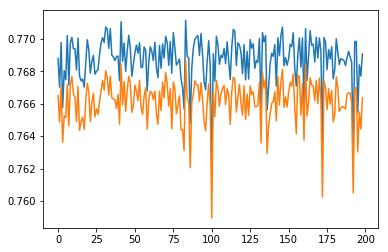

In [142]:
train_auc = []
test_auc = []

for i in range(1,200):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=50)
    
    clf.fit(X_train1, y_train1.values.ravel())
    train_auc.append(roc_auc_score(y_train1, clf.predict(X_train1)))
    test_auc.append(roc_auc_score(y_test1, clf.predict(X_test1)))

train_auc, test_auc

plt.plot(range(199), train_auc)
plt.plot(range(199), test_auc)

In [143]:
train_df = pd.DataFrame(list(zip(train_auc, test_auc)),
              columns=['train_auc','test_auc'])

train_df1_200 = train_df.to_csv("Data/train_df1_200.csv")

##### Training for Type 4 Covertype - Cottonwood

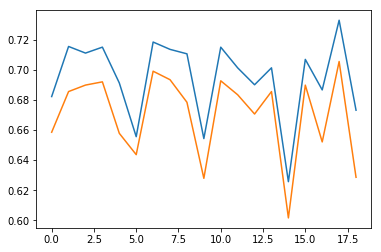

In [144]:
y4 = CoverTypeDF[["Y4"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_encoded, y4)
concat4 = pd.concat([X_train4, y_train4], axis=1)

# normalizer
sds4 = StandardScaler()
sds4.fit(X_train4)
X_train4 = sds4.transform(X_train4)
X_test4 = sds4.transform(X_test4)

# grid training session
train_auc4 = []
test_auc4 = []

for i in range(1,20):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=10)
    
    clf.fit(X_train4, y_train4.values.ravel())
    train_auc4.append(roc_auc_score(y_train4, clf.predict(X_train4)))
    test_auc4.append(roc_auc_score(y_test4, clf.predict(X_test4)))

train_auc4, test_auc4

plt.plot(range(19), train_auc4)
plt.plot(range(19), test_auc4)

In [147]:
train_df4 = pd.DataFrame(list(zip(train_auc4, test_auc4)),
              columns=['train_auc4','test_auc4'])

train_df4 = train_df4.to_csv("Data/train_df4.csv")

##### Training for Type 7 Covertype - Krummholz

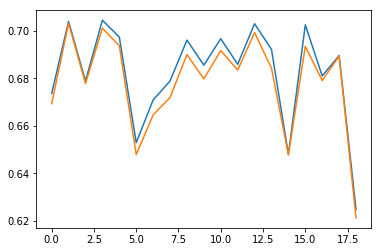

In [146]:
y7 = CoverTypeDF[["Y7"]]
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_encoded, y7)
concat7 = pd.concat([X_train7, y_train7], axis=1)

# normalizer
sds7 = StandardScaler()
sds7.fit(X_train7)
X_train7 = sds7.transform(X_train7)
X_test7 = sds7.transform(X_test7)

# grid training session
train_auc7 = []
test_auc7 = []

for i in range(1,20):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=10)
    
    clf.fit(X_train7, y_train7.values.ravel())
    train_auc7.append(roc_auc_score(y_train7, clf.predict(X_train7)))
    test_auc7.append(roc_auc_score(y_test7, clf.predict(X_test7)))

train_auc7, test_auc7

plt.plot(range(19), train_auc7)
plt.plot(range(19), test_auc7)

In [148]:
train_df7 = pd.DataFrame(list(zip(train_auc7, test_auc7)),
              columns=['train_auc7','test_auc7'])

train_df7 = train_df7.to_csv("Data/train_df7.csv")

In [150]:
params = {
    "max_depth": [5,10,15,20,25],
    "min_samples_split": [5, 10, 14],
    "min_samples_leaf": [2, 5, 10],
    "max_leaf_nodes": [15, 20, 50],
}

In [151]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=20), params, cv=5)

In [152]:
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [5, 10, 14], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
grid.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [5, 10, 14], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [156]:
clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=5,
                                 n_estimators=20)
clf.fit(X_train1, y_train1.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
clf.feature_importances_

array([0.12917165, 0.76093383, 0.01269751, 0.01104362, 0.01060139,
       0.04057838, 0.03497362])

### Save the Model and Load

In [158]:
import pickle
from sklearn.externals import joblib

In [159]:
filename = "./final_covertype.model"

In [160]:
pickle.dump(clf, open(filename, "wb"))

In [161]:
# Save the scaler
joblib.dump(sds1, "covertype_scaler.model")

['covertype_scaler.model']

In [162]:
sds1.mean_

array([8.04357454e-01, 2.95964011e+03, 1.40932580e+01, 2.12168699e+02,
       1.42536379e+02, 2.69492178e+02, 1.98092682e+03])

--- Delete the CLF file to clear it from memory.

In [163]:
del clf

--- Load CLF file in order to apply it to testing set to see how it performs.

In [164]:
clf = pickle.load(open(filename, "rb"))

In [165]:
# CLF specifications
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
# test clf on #35.
X_test1[35], y_test1.values.ravel()[35]

(array([ 0.49318187, -1.43084614, -0.14593764, -0.00630699, -0.19692355,
        -0.00701899, -0.64292219]), 0)

In [167]:
clf.predict([X_test1[35]])

array([0])

In [168]:
clf.predict_proba([X_test1[35]])

array([[0.9069272, 0.0930728]])

In [170]:
clf.predict_proba(X_test1)

array([[0.85734818, 0.14265182],
       [0.91798602, 0.08201398],
       [0.53644497, 0.46355503],
       ...,
       [0.38562902, 0.61437098],
       [0.92422246, 0.07577754],
       [0.90425091, 0.09574909]])